In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv("IRIS.csv")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
 data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#each class count
classes=data['species'].value_counts()
print(classes)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


In [6]:
#data is balanced
#preprocessing
sum(data.isnull().any())

0

In [7]:
data.isnull().values.any()#checking if null data present

False

In [8]:
data.isnull().sum() #checking if null data present

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Text(0, 0.5, 'frequency')

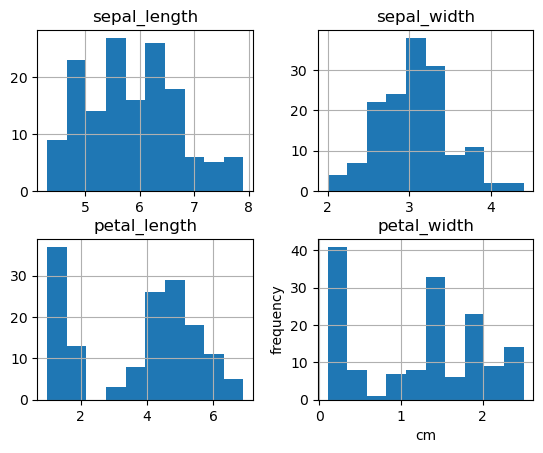

In [9]:
#EDA
data.hist()
plt.xlabel('cm')
plt.ylabel('frequency')
#according to histogram almost all data is normal so now check scatter plots

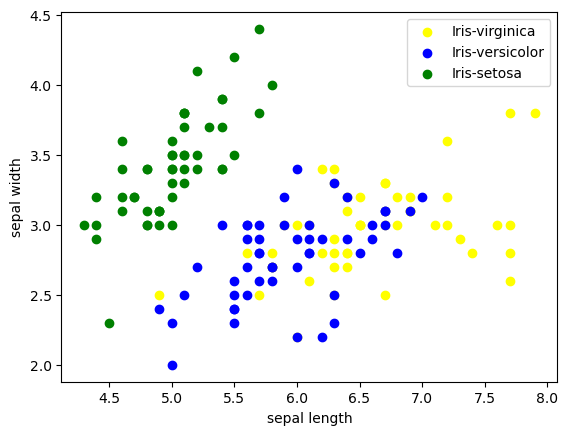

In [10]:
color=['yellow','blue','green']
species=['Iris-virginica','Iris-versicolor','Iris-setosa']
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=color[i],label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

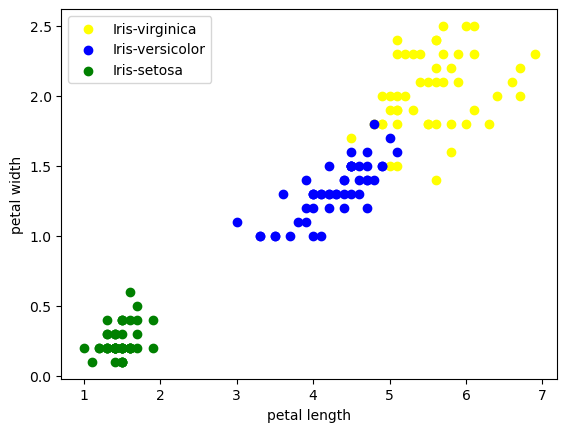

In [11]:
#above its visible that iris verginica and iris versicolor have similar sepal length and width and iris setosa has a very diff length and width so can be separated
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=color[i],label=species[i])
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

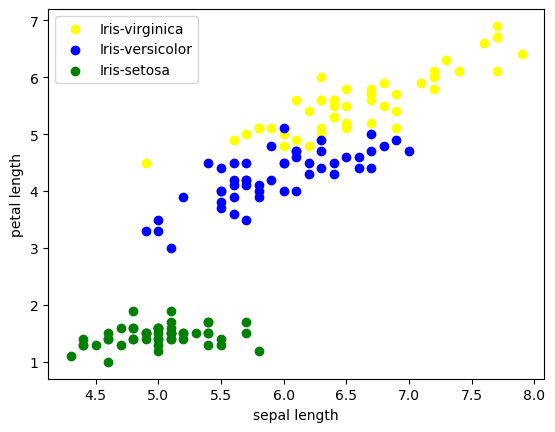

In [12]:
#in above again iris setosa is completely different but even the other two can be separated to some extent as different classes
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=color[i],label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

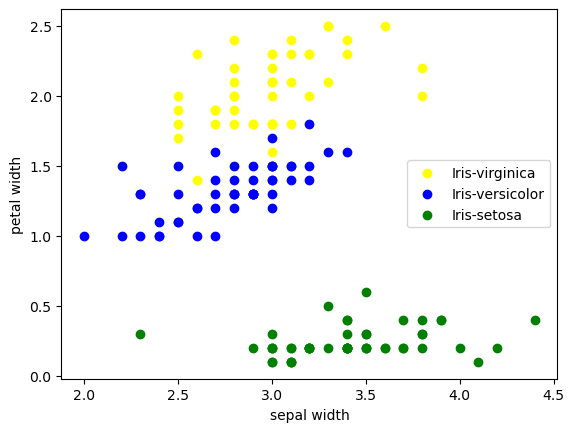

In [13]:
#again similar observation as above one
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_width'],c=color[i],label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()



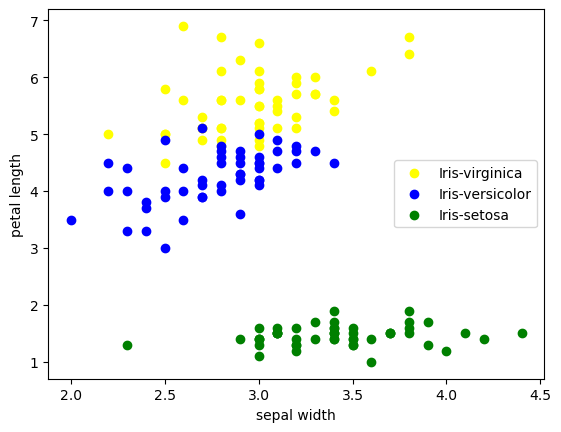

In [14]:
#this graph shows more likeliness to be able to separate all 3 classes into categories so good way to visualise
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_width'],x['petal_length'],c=color[i],label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.legend()


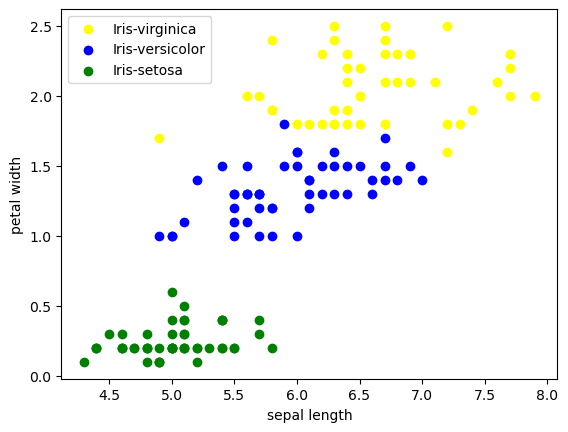

In [15]:
#this graph shows more likeliness to be able to separate all 3 classes into categories so good way to visualise
for i in range(3):
    x=data[data['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_width'],c=color[i],label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.legend()


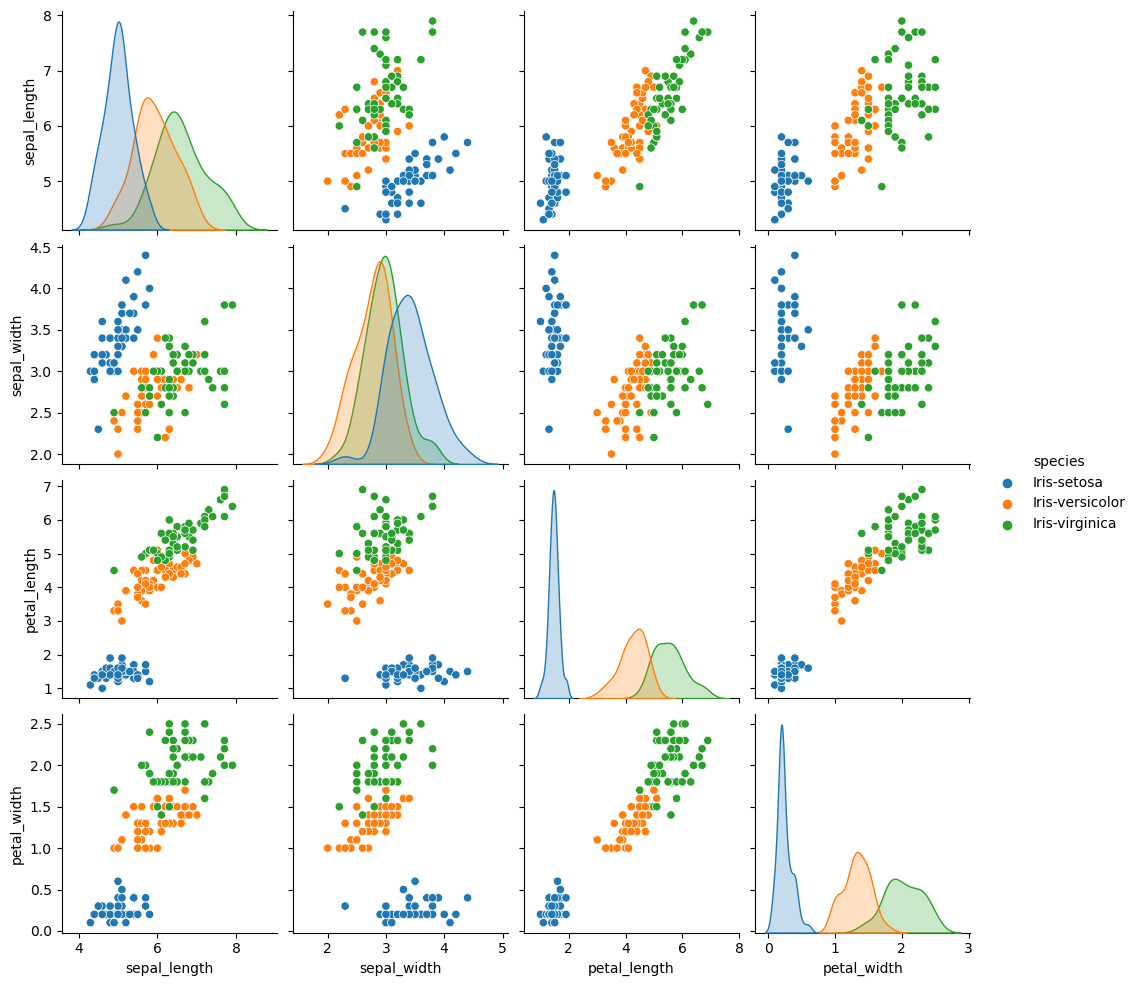

In [16]:
sns.pairplot(data,hue="species")

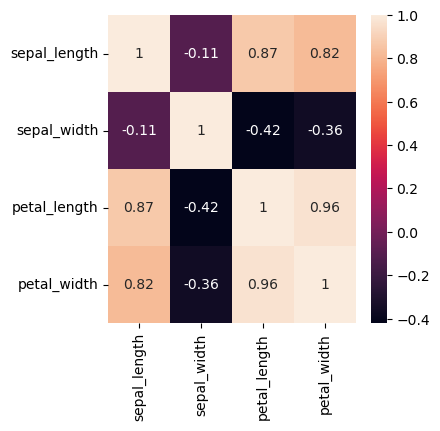

In [17]:
#check for corelation now
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [18]:
#petal length and petal width have a high correlation so one feature can be dropped , we'll drop petal width as petal length is a benchmark for setosa data classification accurately
data=data.drop('petal_width',axis=1)


In [19]:
#label encoding so strings to integers converted
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Species_n'] = le.fit_transform(data['species'])
data
data['Species_n']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_n, Length: 150, dtype: int32

In [20]:
#independent variable X:features
#dependent variable Y: target

X=data.drop(columns=['species','Species_n'])
Y=data['Species_n']
print(X,Y)
#split into training and test data
from sklearn.model_selection import train_test_split
#train:80% data

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

     sepal_length  sepal_width  petal_length
0             5.1          3.5           1.4
1             4.9          3.0           1.4
2             4.7          3.2           1.3
3             4.6          3.1           1.5
4             5.0          3.6           1.4
..            ...          ...           ...
145           6.7          3.0           5.2
146           6.3          2.5           5.0
147           6.5          3.0           5.2
148           6.2          3.4           5.4
149           5.9          3.0           5.1

[150 rows x 3 columns] 0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_n, Length: 150, dtype: int32


In [21]:
'''if u do normal ml basic modelling: u will get 33% accuracy/chance of all three predictions each so we can try doing single feature prediction
on petal length '''
#we know its setosa(0) for sure if petal length<2 from all the plots
#from graph if petal length < around 5.1 its versicolor(1) else virginica(2)
def single_feature_prediction(petal_length):
    if petal_length<2.0:
        return 0
    elif petal_length<5.1:
        return 1
    else:
        return 2


In [22]:
#X_train has petal length as 3rd column:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_train[:,2]

array([1. , 1.5, 4.4, 1.6, 1.3, 5. , 4.5, 1.5, 1.4, 1.5, 5.1, 4.5, 4.7,
       1.3, 1.5, 3.7, 5.1, 5.5, 4.4, 6.1, 4.2, 6.6, 4.5, 1.4, 6.7, 4.1,
       1.4, 1.3, 1.9, 3.5, 4.9, 1.9, 1.6, 1.7, 4.2, 1.5, 4.2, 6.7, 1.4,
       4.3, 5. , 1.4, 4.8, 5.1, 4. , 4.5, 5.4, 4. , 1.7, 3.3, 5.3, 1.4,
       1.2, 3.8, 5. , 1.5, 5.1, 1.5, 1.6, 4.8, 3. , 5.7, 5.1, 5.6, 6.1,
       4. , 1.4, 1.1, 5. , 6. , 1.5, 1.4, 1.3, 4.9, 5.6, 1.4, 5.5, 6. ,
       1.3, 4.7, 4.6, 4.8, 4.7, 5.3, 1.6, 5.4, 4.2, 5.2, 3.5, 3.9, 4.6,
       1.3, 4.6, 4.4, 1.5, 4.1, 6.3, 5.7, 1.5, 3.3, 5.7, 5.8, 1.5, 5.6,
       1.4, 4.9, 6.1, 5.6, 4.1, 5.5, 4.4, 4.3, 4.9, 5.1, 1.7, 4. , 4.5,
       1.2, 4. , 5.9])

In [23]:
manual_y_predictions=np.array([single_feature_prediction(val) for val in X_train[:,2]]) #gives list of predictions

In [24]:
np.mean(Y_train == manual_y_predictions) #true=1,false=0 so mean will give accuracy
#accuracy checking:92.5%


0.925

In [25]:
#now direct ml algorithms applied

In [26]:
#apply ml algorithm directly:all classifier algorithms
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score,confusion_matrix,classification_report

In [27]:
CF={
    "Logistic Regression":LogisticRegression(),
    "Random Forest ":RandomForestClassifier(),
    "KNN":KNeighborsRegressor(),
    "Gradient Boosting":XGBRegressor()
}

for key,cf in CF.items():
    print(key,":")
    cf.fit(X_train,Y_train)
    y_pred=np.array(cf.predict(X_test))
    y_pred=y_pred.astype(int)
    print(y_pred,Y_test)
    #check metrics evaluation
    print("Accuracy:",accuracy_score(Y_test,y_pred))
    print("Precision:", precision_score(Y_test, y_pred, average='macro'))
    print("Recall:", recall_score(Y_test, y_pred, average='macro'))
    print("F1 score:", f1_score(Y_test, y_pred, average='macro'))

Logistic Regression :
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Random Forest  :
[1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 0.9666666666666667
Precision: 0.9722222222222222
Recall: 0.9629629629629629
F1 score: 0.9658994032395567
KNN :
[1 0 2 1 1 0 1 1 1 1 1 0 0 0 0 1 2 1 1 2 0 1 0 2 2 1 2 2 0 0] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 0.8666666666666667
Precision: 0.8974358974358975
Recall: 0.8787878787878788
F1 score: 0.8653198653198654
Gradient Boosting :
[1 0 2 1 1 0 0 1 1 0 1 0 0 0 0 1 2 0 0 2 0 1 0 2 1 1 2 1 0 0] [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy: 0.6666666666666666
Precision: 0.7229437229437229
Recall: 0.67003367003367
F1 score: 0.6527777777777778


In [28]:
#from above logistic regression and random forest have best accuracy
#we can load logistic regression model in a file
lr=LogisticRegression()
lr.fit(X,Y)


LogisticRegression()

In [29]:
import pickle
with open('lr.pkl', 'wb') as file:
    pickle.dump(lr, file)
with open('lr.pkl', 'rb') as file:
    load_model=pickle.load(file)

In [39]:
input_data=np.array([5.4,3,4.4,0.2]).reshape(1,-1)
#have to remove petal width
input_data=input_data[0,:3].reshape(1,-1)

#make predictions 
y_pred = load_model.predict(input_data)

C:\Users\srika\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [40]:
y_pred

array([1])

In [41]:
if y_pred[0]==0:
    print("Iris-setosa")
elif y_pred[0]==1:
    print("Iris-versicolor")
else:
    print("Iris-virginica")

Iris-versicolor
